In [11]:
#for exploring dataframe
import numpy as np
import pandas as pd

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for interactivity
from ipywidgets import interact

#for animated graphs
import plotly.express as px
import plotly.graph_objects as go

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

#importing libraries for machine learning
from sklearn.linear_model import LogisticRegression as lm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [12]:
df = pd.read_csv(r"C:\Users\manvi\OneDrive\Desktop\ML Model\dataset.csv")

In [13]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42.0,43.0,20.879744,82.002744,6.502985,203.983200,rice
1,85,58.0,41.0,22.000940,80.319644,7.038096,226.655537,rice
2,60,55.0,44.0,23.004459,82.320763,7.840207,263.964248,rice
3,74,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice
4,78,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34.0,32.0,26.774637,66.413269,6.780064,NaN,coffee
2196,99,15.0,27.0,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33.0,30.0,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32.0,34.0,26.272418,52.127394,6.758793,127.175293,coffee


In [14]:
df.shape

(2200, 8)

In [15]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42.0,43.0,20.879744,82.002744,6.502985,203.983200,rice
1,85,58.0,41.0,22.000940,80.319644,7.038096,226.655537,rice
2,60,55.0,44.0,23.004459,82.320763,7.840207,263.964248,rice
3,74,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice
4,78,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2199 non-null   float64
 2   K            2197 non-null   float64
 3   temperature  2170 non-null   float64
 4   humidity     2168 non-null   float64
 5   ph           2170 non-null   float64
 6   rainfall     2174 non-null   float64
 7   label        2180 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 137.6+ KB


In [17]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2199.000000,2197.000000,2170.000000,2168.000000,2170.000000,2174.000000
mean,50.558182,53.334243,48.179335,25.626523,71.534974,6.471553,103.655826
std,36.915772,32.968933,50.673278,5.065632,22.259177,0.773362,54.981844
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.770458,60.231681,5.972749,64.592808
50%,37.000000,51.000000,32.000000,25.598693,80.524876,6.425045,95.085968
75%,84.250000,68.000000,49.000000,28.561076,90.008429,6.924379,124.408005
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


<AxesSubplot:>

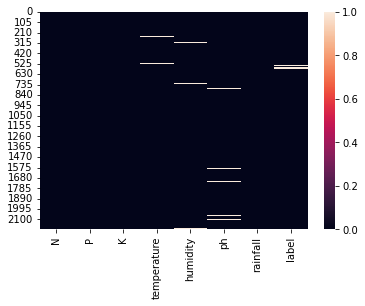

In [18]:
sns.heatmap(df.isnull())

In [19]:
df.isna().sum()

N               0
P               1
K               3
temperature    30
humidity       32
ph             30
rainfall       26
label          20
dtype: int64

## Data Cleaning

In [20]:
df.P = df.P.fillna(value = 0)
df.K = df.K.fillna(value = 0)

In [21]:
df.temperature = df.temperature.fillna(value = df.temperature.mean())
df.humidity = df.humidity.fillna(value = df.humidity.mean())
df.ph = df.ph.fillna(value = df.ph.mean())
df.rainfall = df.rainfall.fillna(value = df.rainfall.mean())

In [22]:
df.label = df.label.fillna(value = df.label.mode()[0])

In [23]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [24]:
df['label'].value_counts()

apple          120
grapes         100
cotton         100
coconut        100
muskmelon      100
watermelon     100
papaya         100
rice           100
orange         100
pomegranate    100
lentil          99
coffee          99
jute            99
banana          99
maize           99
mango           99
kidneybeans     99
blackgram       98
chickpea        98
mothbeans       97
pigeonpeas      97
mungbean        97
Name: label, dtype: int64

## Exploratory Data Analysis

### Statistical Study

In [25]:
@interact
def summary(crops= list(df['label'].value_counts().index)):
    x = df[df['label']==crops]
    print("____________________________________________________")
    print("Statistics for Nitrogen")
    print('Minimum Nitrogen Required: ',x['N'].min())
    print('Average Nitrogen Required: ',x['N'].mean())
    print('Maximum Nitrogen Required: ',x['N'].max())
    
    
    print("____________________________________________________")
    print("Statistics for Phosphrus")
    print('Minimum Phosphorus Required: ',x['P'].min())
    print('Average Phosphorus Required: ',x['P'].mean())
    print('Maximum Phosphorus Required: ',x['P'].max())

    print("____________________________________________________")
    print("Statistics for Pottasium")
    print('Minimum Pottasium Required: ',x['K'].min())
    print('Average Pottasium Required: ',x['K'].mean())
    print('Maximum Pottaisum Required: ',x['K'].max())

    print("____________________________________________________")
    print("Statistics for Temperature")
    print('Minimum Temperature Required: {:.2f}'.format(x['temperature'].min()))
    print('Average Temperature Required: {:.2f}'.format(x['temperature'].mean()))
    print('Maximum Temperature Required: {:.2f}'.format(x['temperature'].max()))
    
    
    print("____________________________________________________")
    print("Statistics for Humidity")
    print('Minimum Humidity Required: {:.2f}'.format(x['humidity'].min()))
    print('Average Humidity Required: {:.2f}'.format(x['humidity'].mean()))
    print('Maximum Humidity Required: {:.2f}'.format(x['humidity'].max()))
    
    print("____________________________________________________")
    print("Statistics for ph")
    print('Minimum ph Required: {:.2f}'.format(x['ph'].min()))
    print('Average ph Required: {:.2f}'.format(x['ph'].mean()))
    print('Maximum ph Required: {:.2f}'.format(x['ph'].max()))
    
    
    print("____________________________________________________")
    print("Statistics for Rainfall")
    print('Minimum Rainfall Required: {:.2f} '.format(x['rainfall'].min()))
    print('Average Rainfall Required: {:.2f}'.format(x['rainfall'].mean()))
    print('Maximum Rainfall Required: {:.2f}'.format(x['rainfall'].max()))

interactive(children=(Dropdown(description='crops', options=('apple', 'grapes', 'cotton', 'coconut', 'muskmelo…

In [26]:
@interact
def compare(condition=['N','P','K','temperature','ph','humidity','rainfall']):
    print("Average value for: {:.2f}".format(df[condition].mean()))
    print("-----------------------------------------------------")
    print("Rice: {0:.2f}".format(df[(df['label']=='rice')][condition].mean()))
    print("Black Grams: {0:.2f}".format(df[(df['label']=='blackgram')][condition].mean()))
    print("Banana: {0:.2f}".format(df[(df['label']=='banana')][condition].mean()))
    print("Jute: {0:.2f}".format(df[(df['label']=='jute')][condition].mean()))

interactive(children=(Dropdown(description='condition', options=('N', 'P', 'K', 'temperature', 'ph', 'humidity…

In [27]:
@interact 
def compare(condition=['N','P','K','temperature','ph','humidity','rainfall']):
    print(f"Crops which require greater {condition} than than average",'\n')
    print(df[df[condition] > df[condition].mean()]['label'].unique())
    print("------------------------------------------------")
    print(f"Crops which require lesser {condition} than than average",'\n')
    print(df[df[condition] <= df[condition].mean()]['label'].unique())

interactive(children=(Dropdown(description='condition', options=('N', 'P', 'K', 'temperature', 'ph', 'humidity…

In [28]:
print("Some interesting patterns")
print("----------------------------")
print("Crops which require very high ratio of Nitrogen Content in soil: ",df[df['N']>120]['label'].unique())
print("Crops which require very high ratio of Phosphorus Content in soil: ",df[df['P']>100]['label'].unique())
print("Crops which require very high ratio of Pottasium Content in soil: ",df[df['K']>200]['label'].unique())
print("Crops which require very high Rainfall: ",df[df['rainfall']>200]['label'].unique())
print("Crops which require very Low Temperature: ",df[df['temperature']<10]['label'].unique())
print("Crops which require very High Temperature: ",df[df['temperature']>40]['label'].unique())
print("Crops which require very Low Humidity: ",df[df['humidity']<20]['label'].unique())
print("Crops which require very High pH value ",df[df['ph']>9]['label'].unique())
print("Crops which require very Low pH value: ",df[df['ph']<4]['label'].unique())

Some interesting patterns
----------------------------
Crops which require very high ratio of Nitrogen Content in soil:  ['cotton']
Crops which require very high ratio of Phosphorus Content in soil:  ['grapes' 'apple']
Crops which require very high ratio of Pottasium Content in soil:  ['grapes' 'apple']
Crops which require very high Rainfall:  ['rice' 'papaya' 'coconut']
Crops which require very Low Temperature:  ['grapes']
Crops which require very High Temperature:  ['grapes' 'papaya']
Crops which require very Low Humidity:  ['chickpea' 'apple' 'kidneybeans']
Crops which require very High pH value  ['mothbeans']
Crops which require very Low pH value:  ['mothbeans']


In [29]:
print("Summer Crops")
print(df[(df['temperature']>30) & (df['humidity']>50)]['label'].unique())

print("---------------------------------------------------")
print("Winter Crops")
print(df[(df['temperature']<20) & (df['humidity']>30)]['label'].unique())

print("---------------------------------------------------")
print("Rainy Crops")
print(df[(df['rainfall']>200) & (df['humidity']>50)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'apple' 'mango' 'grapes' 'orange'
 'papaya']
---------------------------------------------------
Winter Crops
['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'lentil' 'apple'
 'pomegranate' 'grapes' 'orange']
---------------------------------------------------
Rainy Crops
['rice' 'papaya' 'coconut']


### Visualisation

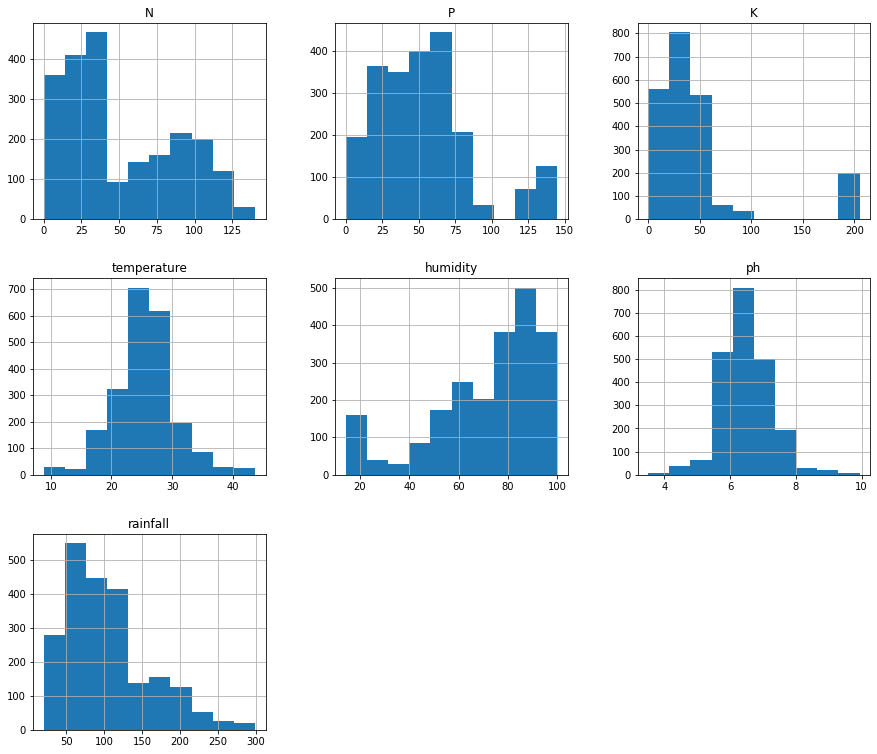

In [30]:
df.hist(bins = 10 , figsize = (15,13))
plt.show()

<AxesSubplot:>

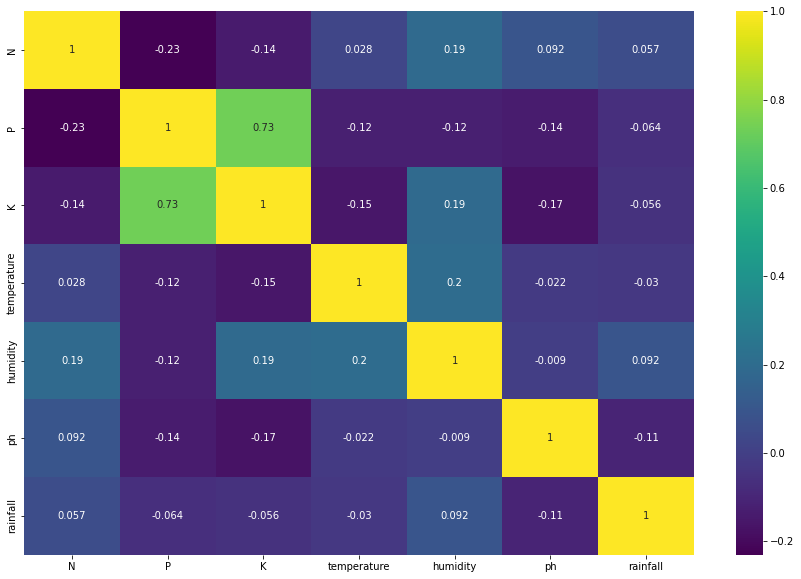

In [31]:
plt.figure(figsize = (15,10))
correlation = df.corr()
sns.heatmap(correlation , annot = True , cmap = 'viridis')

<AxesSubplot:xlabel='label', ylabel='count'>

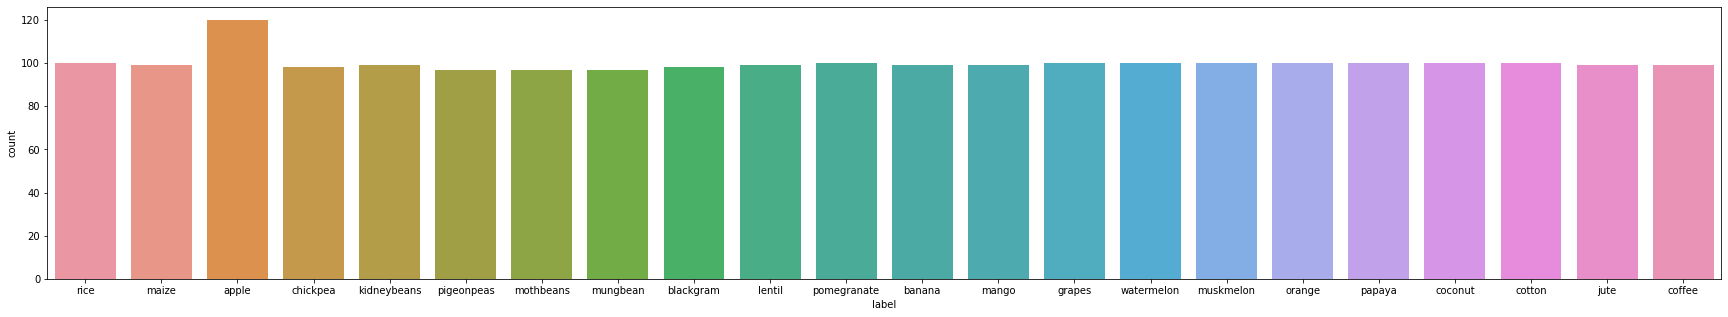

In [32]:
plt.figure(figsize = (30 , 5))
sns.countplot(data = df , x = 'label' )

<AxesSubplot:xlabel='label', ylabel='N'>

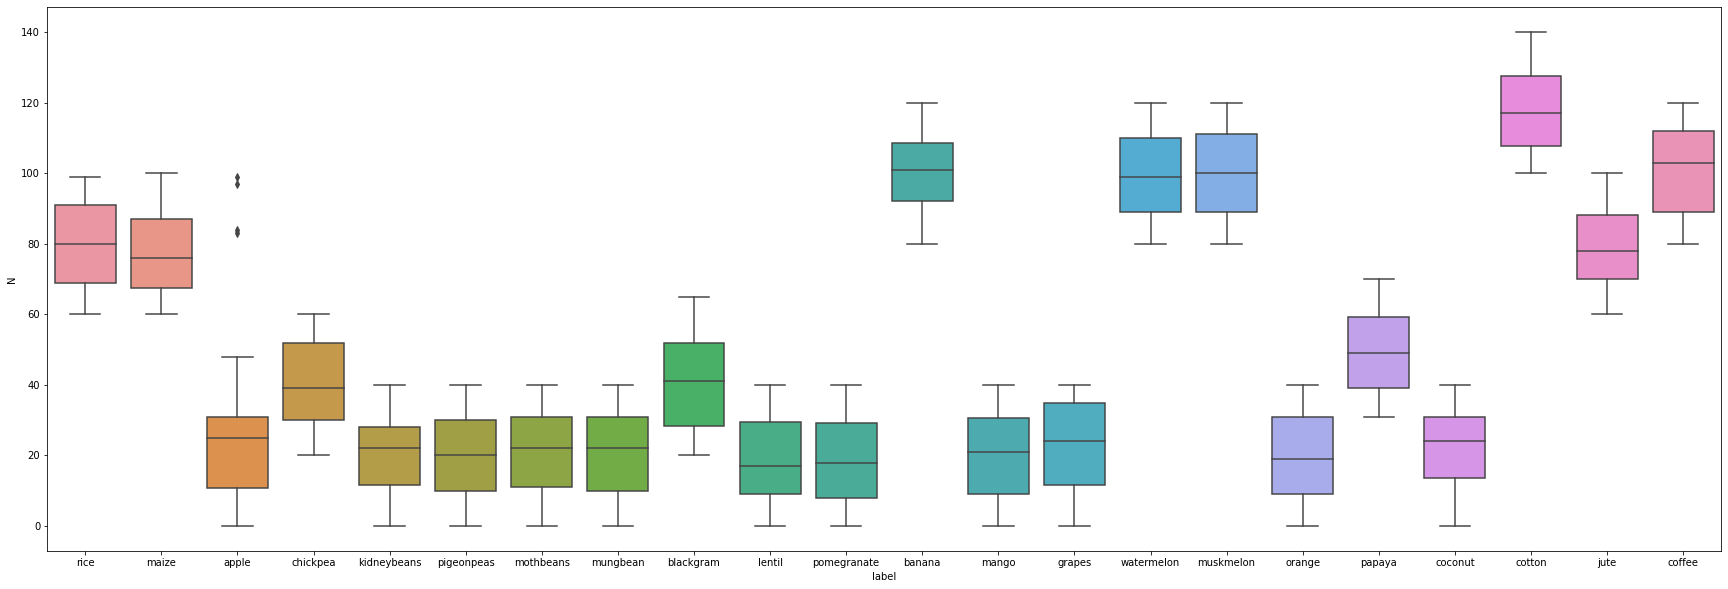

In [33]:
plt.figure(figsize = (30 , 10))
sns.boxplot(data = df , x = 'label' , y = 'N')

<AxesSubplot:xlabel='label', ylabel='P'>

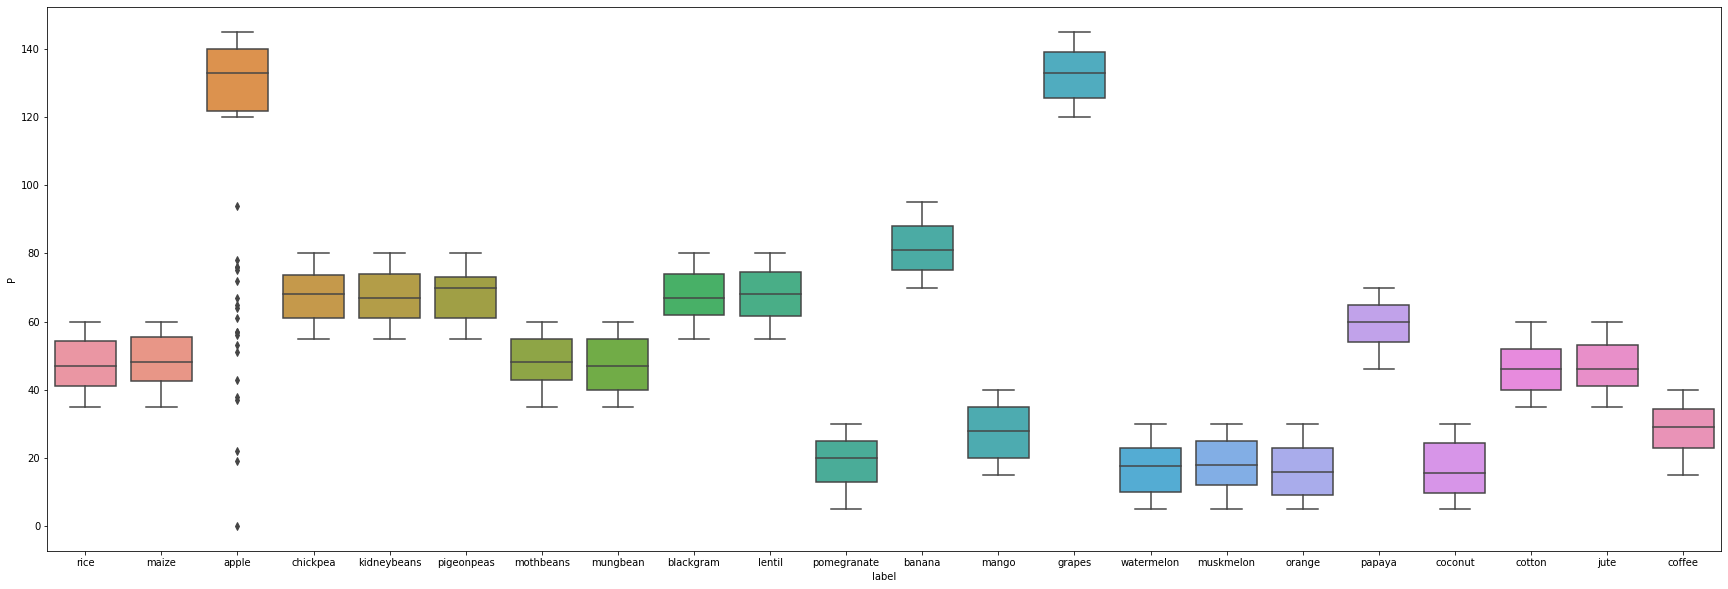

In [34]:
plt.figure(figsize = (30 , 10))
sns.boxplot(data = df , x = 'label' , y = 'P')

<AxesSubplot:xlabel='label', ylabel='K'>

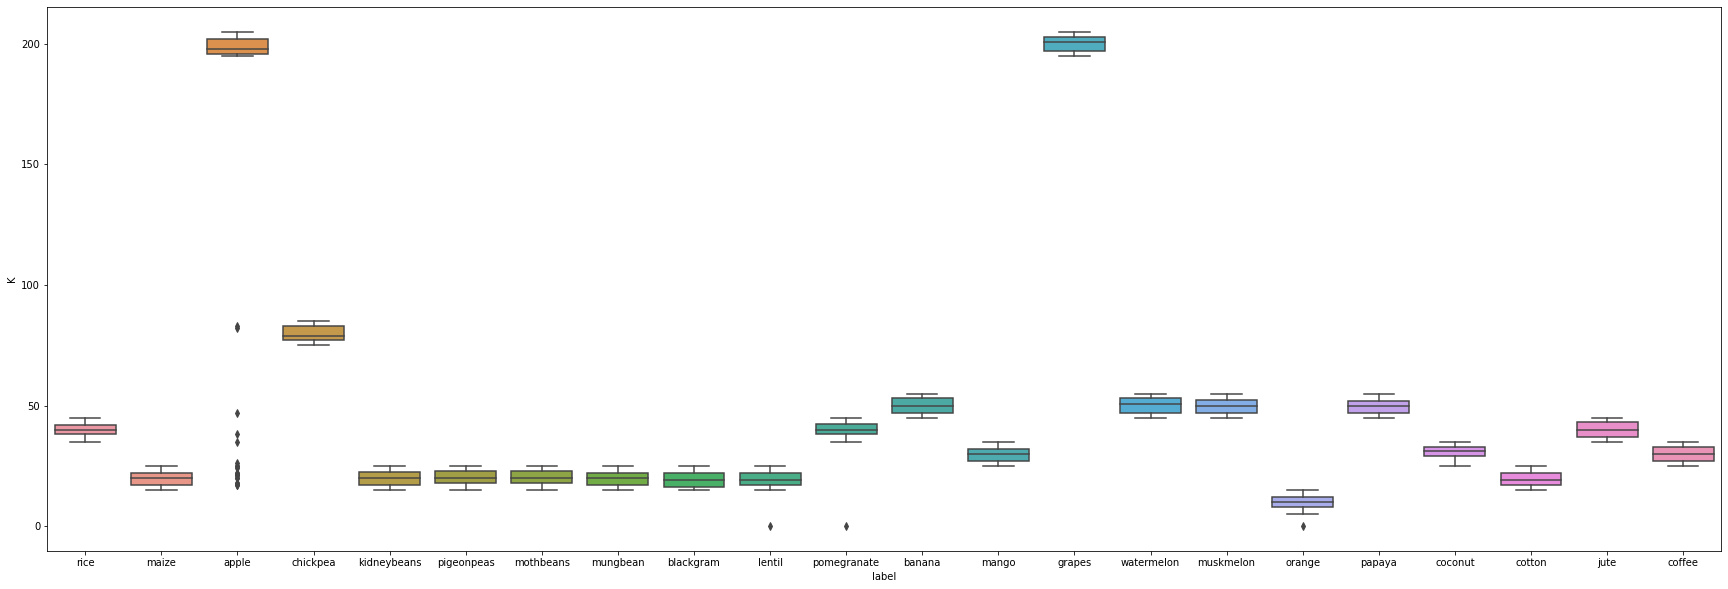

In [35]:
plt.figure(figsize = (30 , 10))
sns.boxplot(data = df , x = 'label' , y = 'K')

<AxesSubplot:xlabel='label', ylabel='temperature'>

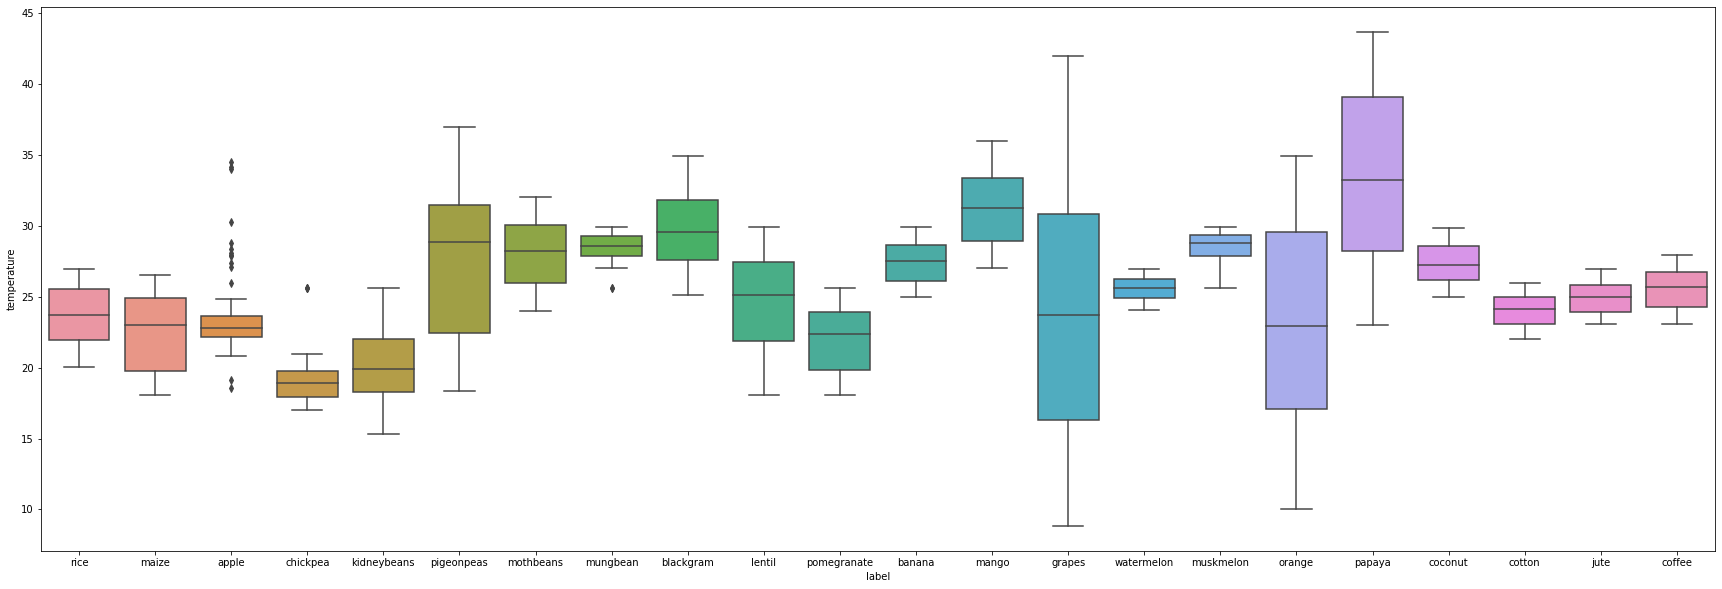

In [36]:
plt.figure(figsize = (30 , 10))
sns.boxplot(data = df , x = 'label' , y = 'temperature')

<AxesSubplot:xlabel='label', ylabel='humidity'>

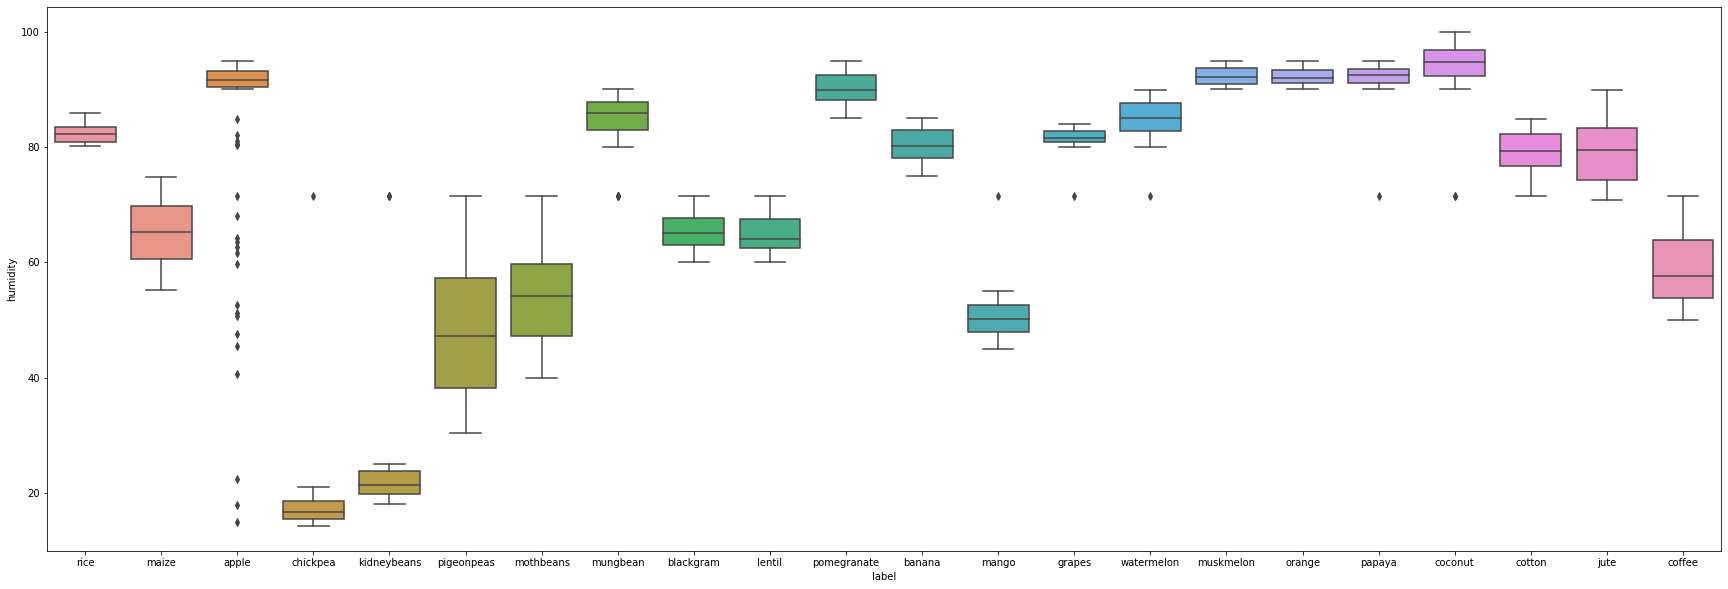

In [37]:
plt.figure(figsize = (30 , 10))
sns.boxplot(data = df , x = 'label' , y = 'humidity')

<AxesSubplot:xlabel='label', ylabel='ph'>

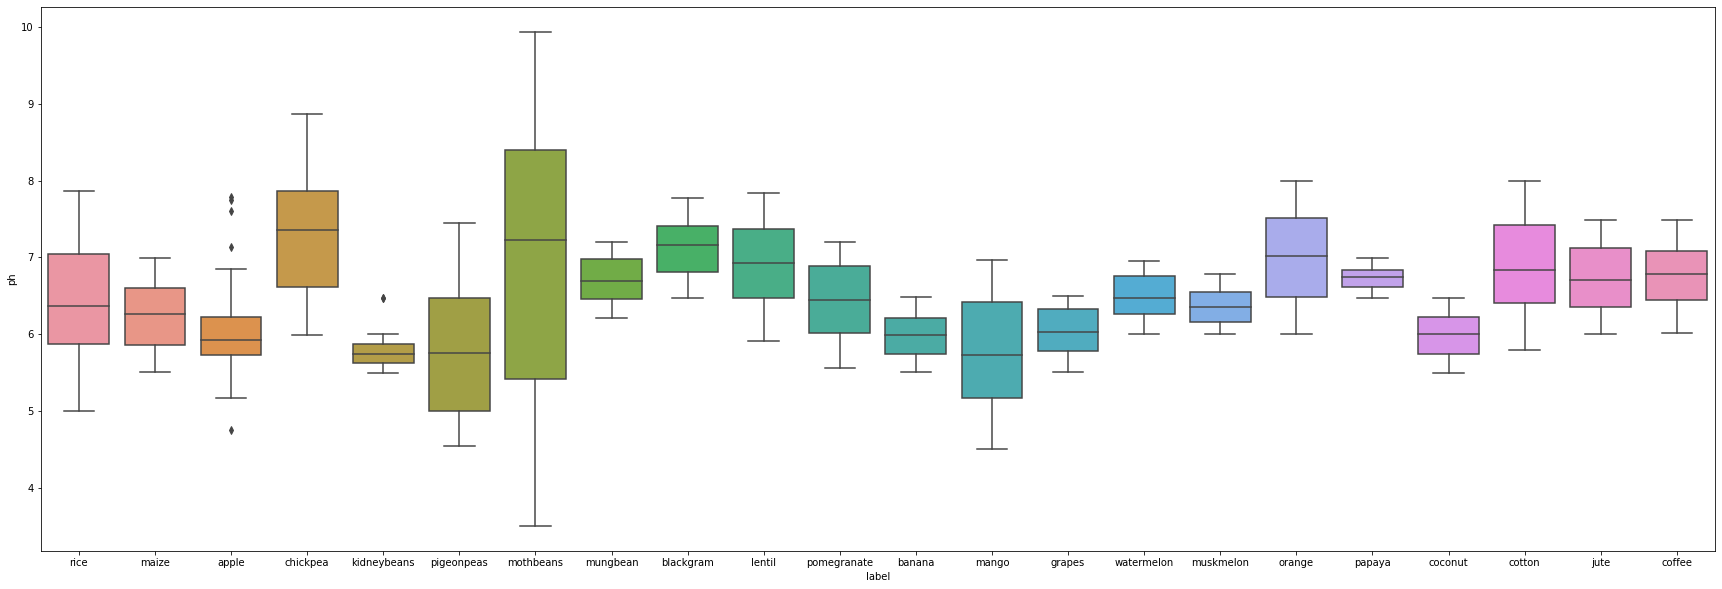

In [38]:
plt.figure(figsize = (30 , 10))
sns.boxplot(data = df , x = 'label' , y = 'ph')

<AxesSubplot:xlabel='label', ylabel='rainfall'>

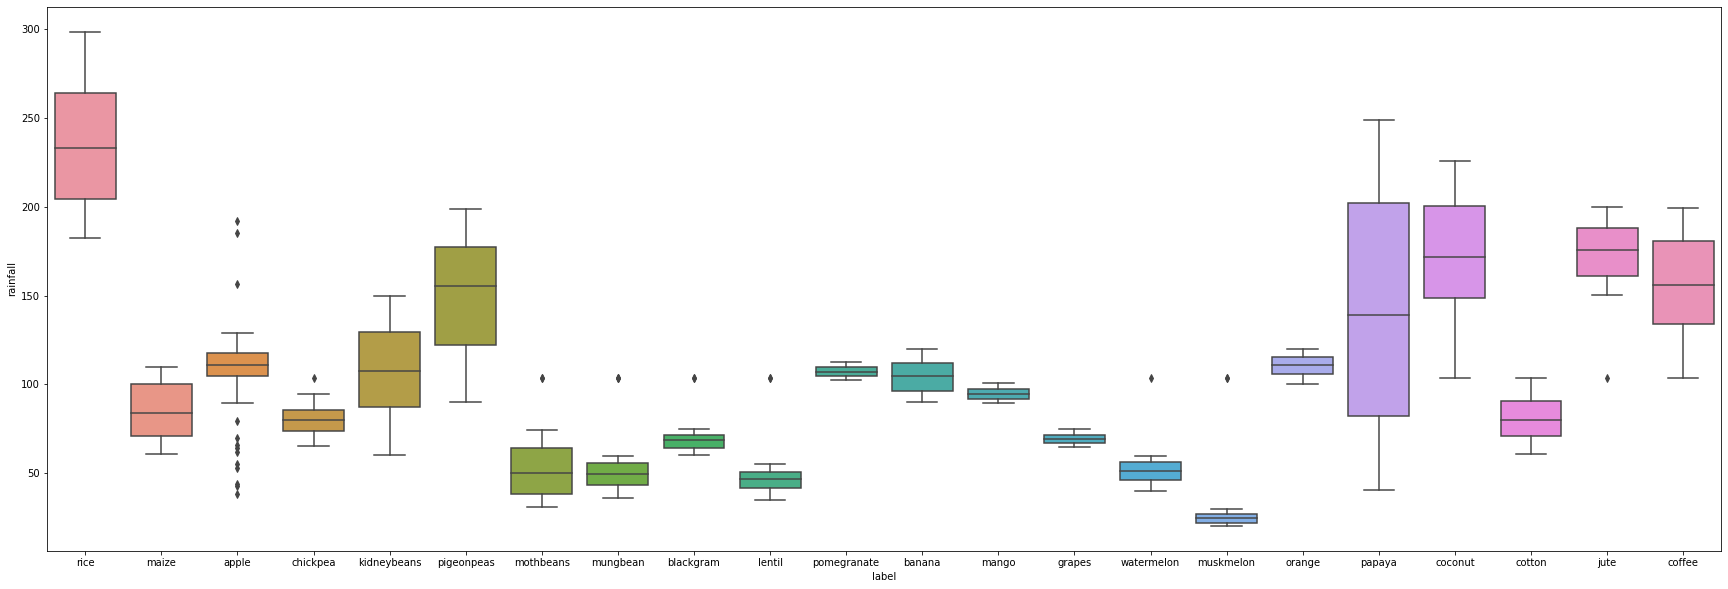

In [39]:
plt.figure(figsize = (30 , 10))
sns.boxplot(data = df , x = 'label' , y = 'rainfall')

In [40]:
fig = px.histogram(df , x ='N', marginal = 'violin')
fig.update_traces(opacity = 0.85)
fig.show()

fig = px.histogram(df , x ='P', marginal = 'violin')
fig.update_traces(opacity = 0.85)
fig.show()

fig = px.histogram(df , x ='K', marginal = 'violin')
fig.update_traces(opacity = 0.85)
fig.show()

fig = px.histogram(df , x ='temperature', marginal = 'violin')
fig.update_traces(opacity = 0.85)
fig.show()

fig = px.histogram(df , x ='humidity', marginal = 'violin')
fig.update_traces(opacity = 0.85)
fig.show()

fig = px.histogram(df , x ='ph', marginal = 'violin')
fig.update_traces(opacity = 0.85)
fig.show()

fig = px.histogram(df , x ='rainfall', marginal = 'violin')
fig.update_traces(opacity = 0.85)
fig.show()                  

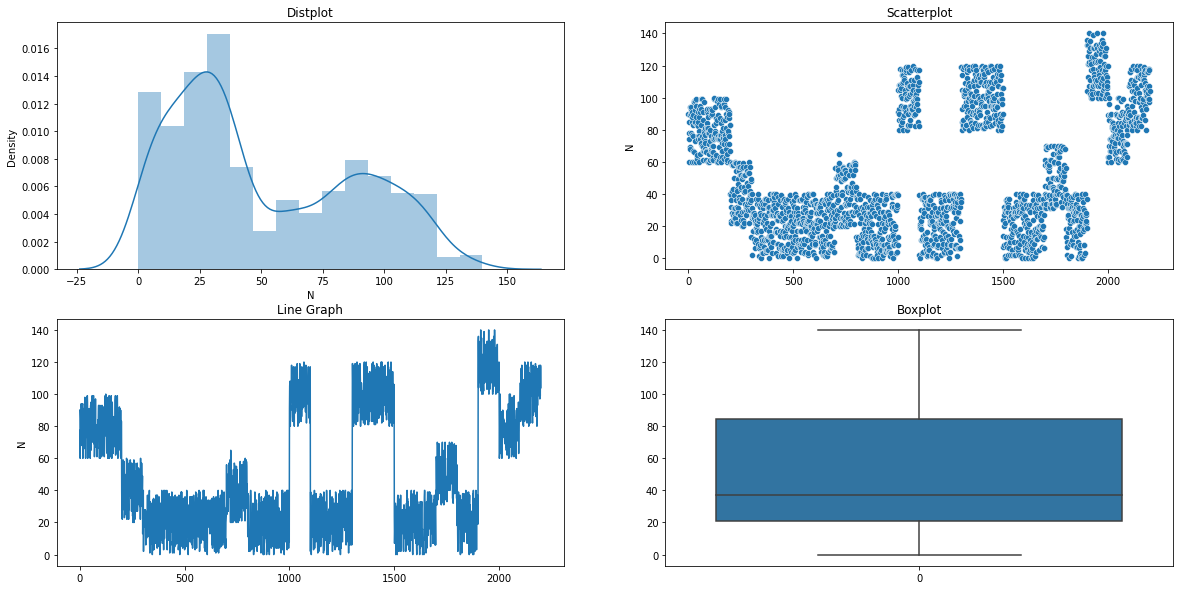

In [41]:
fig = plt.figure(figsize=(20,10))

#1
plt.subplot(2,2,1)
plt.title('Distplot')
sns.distplot(df.N)

#2
plt.subplot(2,2,2)
plt.title('Scatterplot')
sns.scatterplot(data = df,x = df.index,y = df.N )

#3
plt.subplot(2,2,3)
plt.title('Line Graph')
sns.lineplot(data = df, x = df.index,y = df.N)

#4
plt.subplot(2,2,4)
plt.title('Boxplot')
sns.boxplot(data = df['N'])

plt.show()

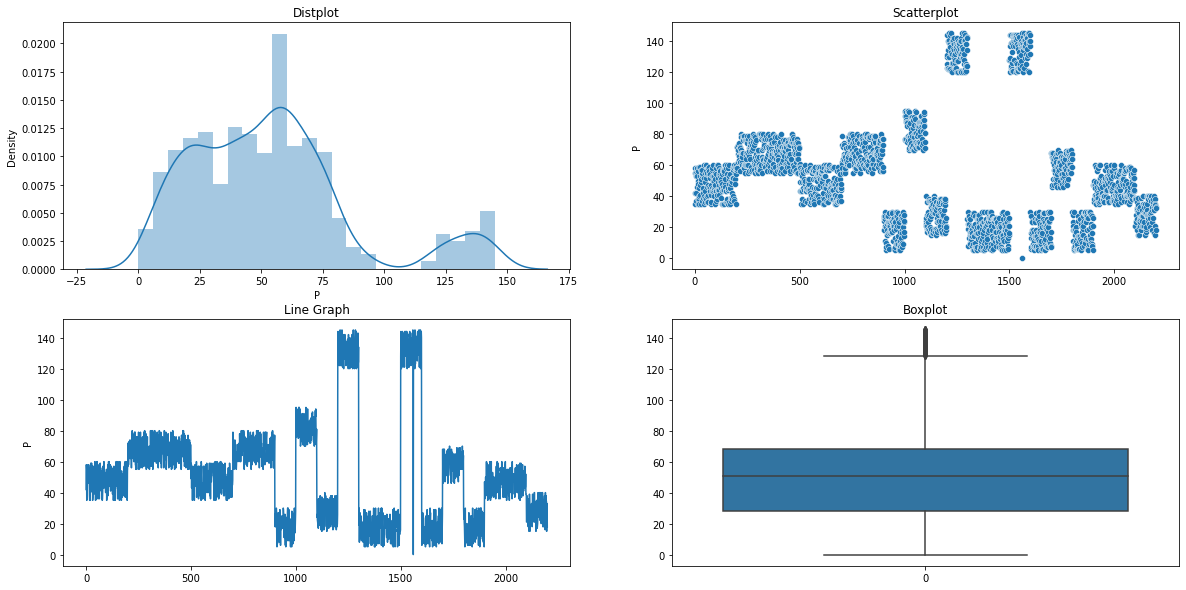

In [42]:
fig = plt.figure(figsize=(20,10))

#1
plt.subplot(2,2,1)
plt.title('Distplot')
sns.distplot(df.P)

#2
plt.subplot(2,2,2)
plt.title('Scatterplot')
sns.scatterplot(data = df,x = df.index,y = df.P)

#3
plt.subplot(2,2,3)
plt.title('Line Graph')
sns.lineplot(data = df, x = df.index,y = df.P)

#4
plt.subplot(2,2,4)
plt.title('Boxplot')
sns.boxplot(data = df['P'])

plt.show()

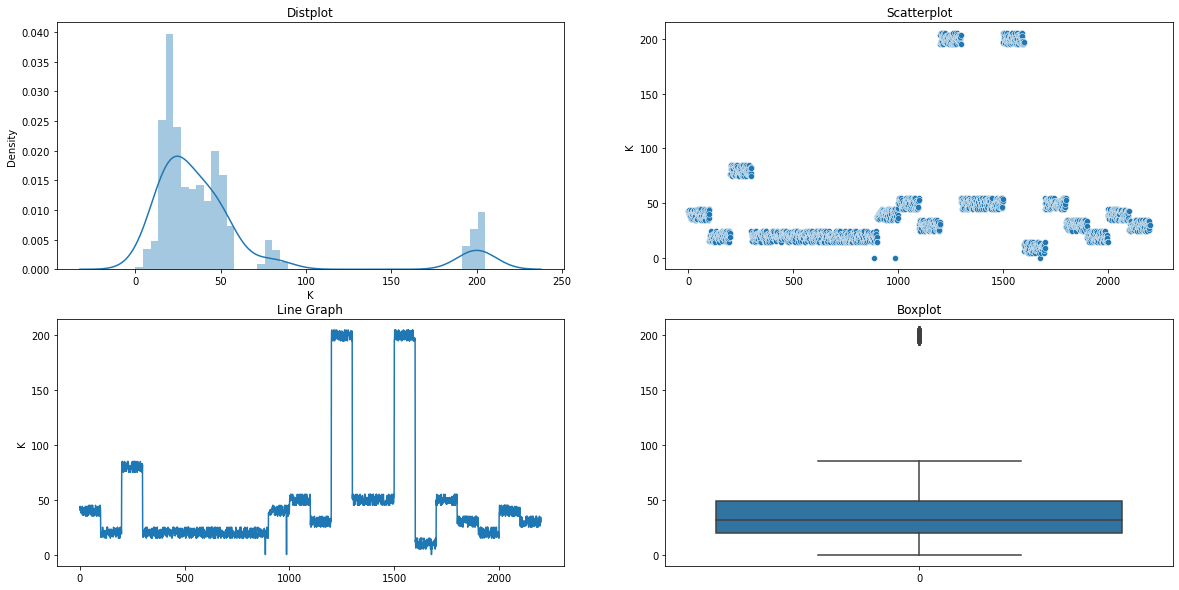

In [43]:
fig = plt.figure(figsize=(20,10))

#1
plt.subplot(2,2,1)
plt.title('Distplot')
sns.distplot(df.K)

#2
plt.subplot(2,2,2)
plt.title('Scatterplot')
sns.scatterplot(data = df,x = df.index,y = df.K)

#3
plt.subplot(2,2,3)
plt.title('Line Graph')
sns.lineplot(data = df, x = df.index,y = df.K)

#4
plt.subplot(2,2,4)
plt.title('Boxplot')
sns.boxplot(data = df['K'])

plt.show()

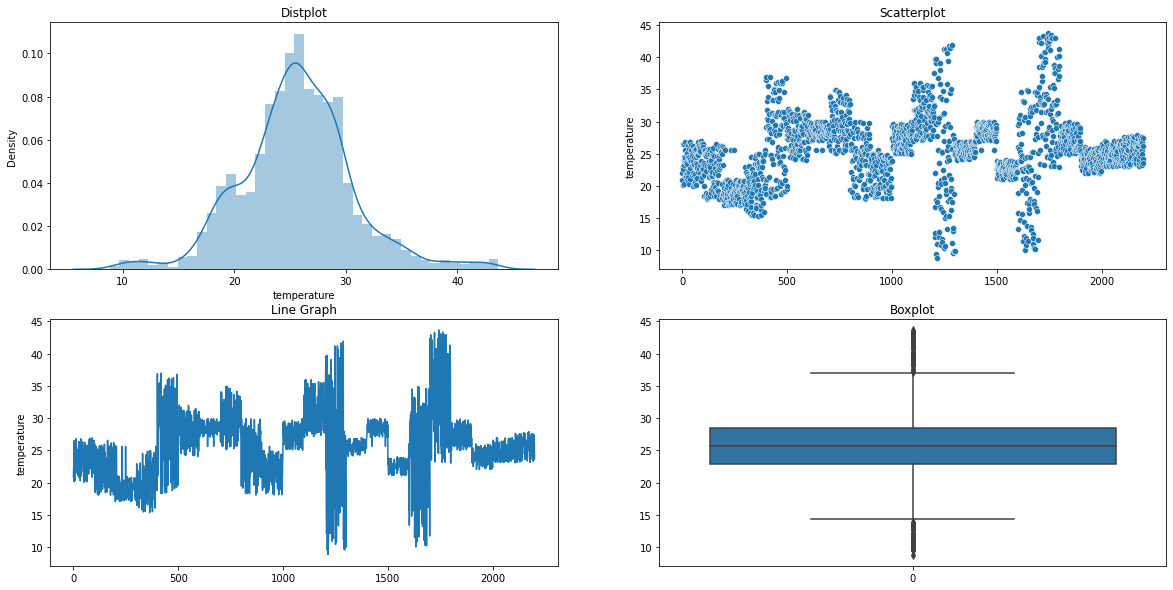

In [44]:
fig = plt.figure(figsize=(20,10))

#1
plt.subplot(2,2,1)
plt.title('Distplot')
sns.distplot(df.temperature)

#2
plt.subplot(2,2,2)
plt.title('Scatterplot')
sns.scatterplot(data = df,x = df.index,y = df.temperature)

#3
plt.subplot(2,2,3)
plt.title('Line Graph')
sns.lineplot(data = df, x = df.index,y = df.temperature)

#4
plt.subplot(2,2,4)
plt.title('Boxplot')
sns.boxplot(data = df['temperature'])

plt.show()

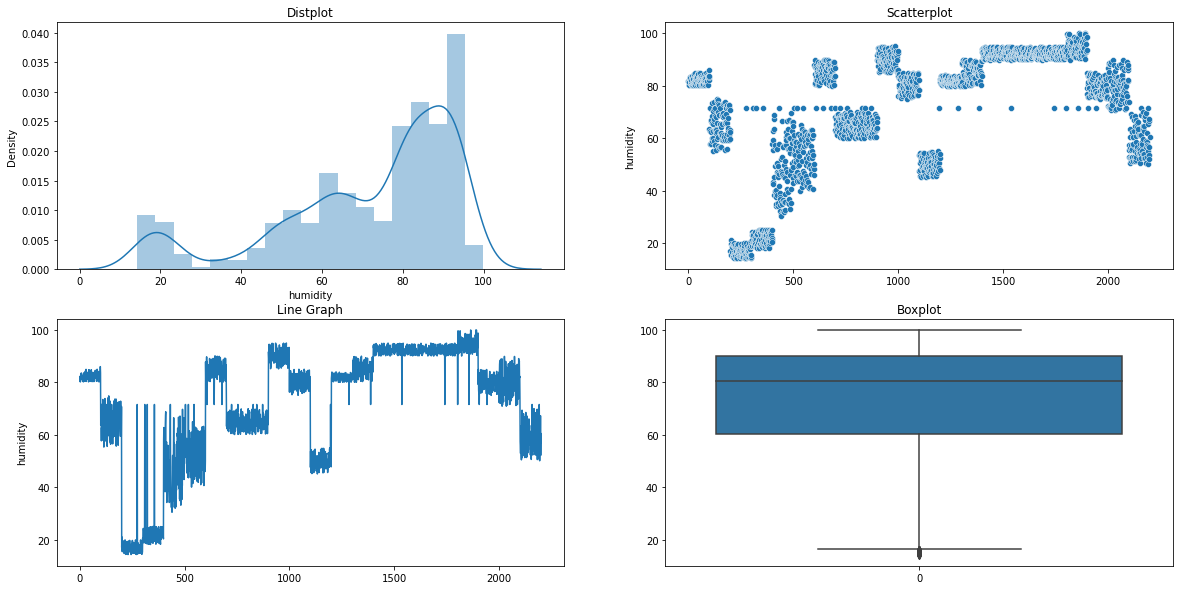

In [45]:
fig = plt.figure(figsize=(20,10))

#1
plt.subplot(2,2,1)
plt.title('Distplot')
sns.distplot(df.humidity)

#2
plt.subplot(2,2,2)
plt.title('Scatterplot')
sns.scatterplot(data = df,x = df.index,y = df.humidity)

#3
plt.subplot(2,2,3)
plt.title('Line Graph')
sns.lineplot(data = df, x = df.index,y = df.humidity)

#4
plt.subplot(2,2,4)
plt.title('Boxplot')
sns.boxplot(data = df['humidity'])

plt.show()

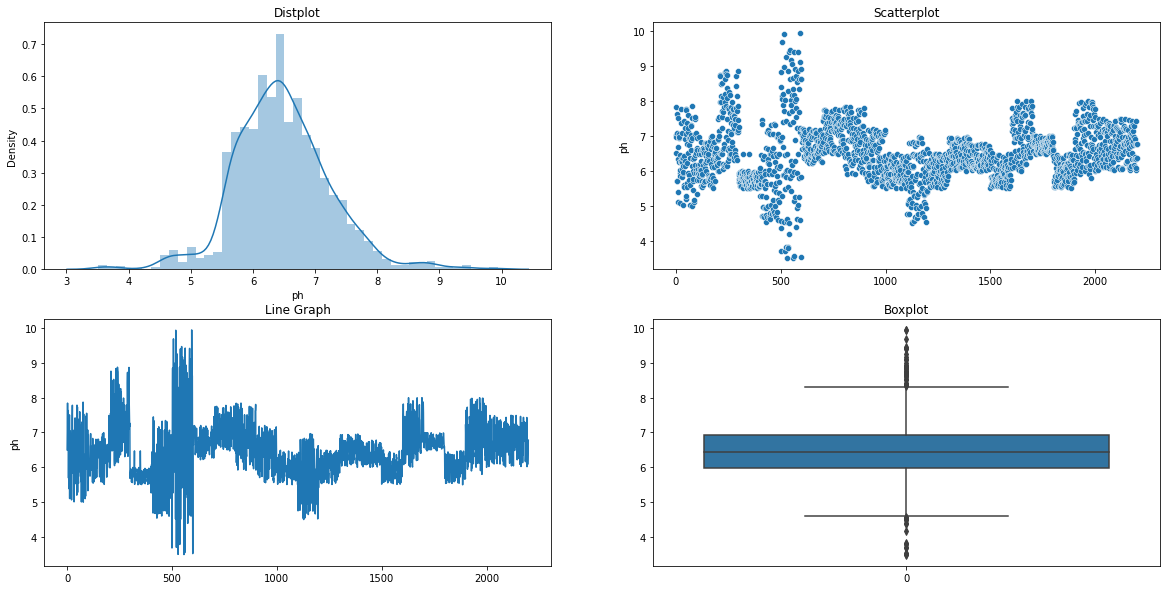

In [46]:
fig = plt.figure(figsize=(20,10))

#1
plt.subplot(2,2,1)
plt.title('Distplot')
sns.distplot(df.ph)

#2
plt.subplot(2,2,2)
plt.title('Scatterplot')
sns.scatterplot(data = df,x = df.index,y = df.ph)

#3
plt.subplot(2,2,3)
plt.title('Line Graph')
sns.lineplot(data = df, x = df.index,y = df.ph)

#4
plt.subplot(2,2,4)
plt.title('Boxplot')
sns.boxplot(data = df['ph'])

plt.show()

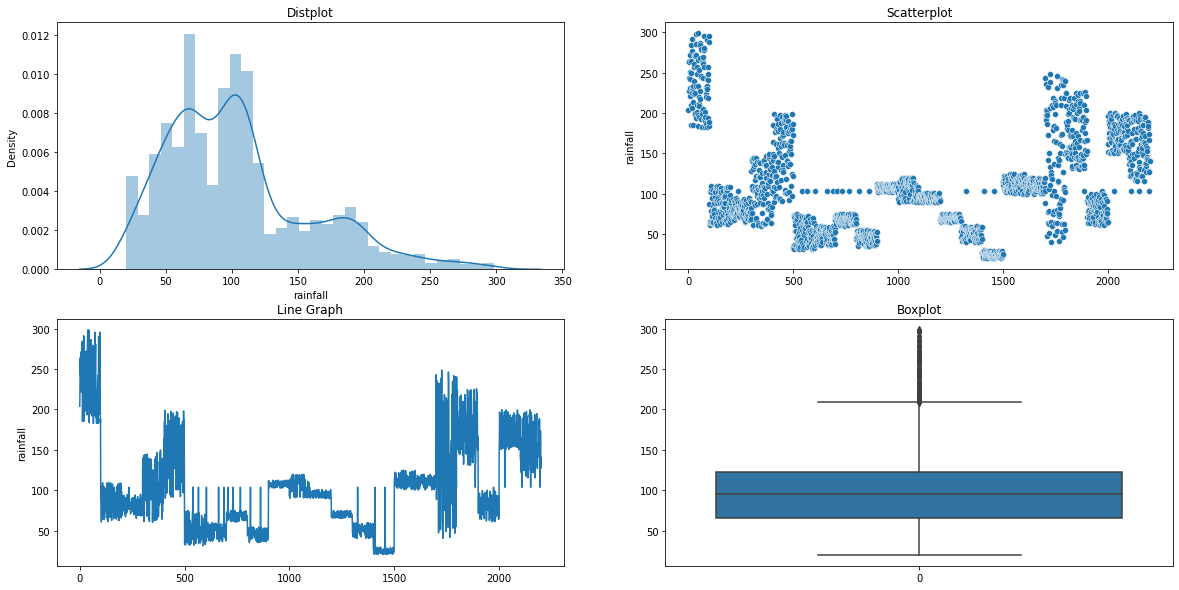

In [47]:
fig = plt.figure(figsize=(20,10))

#1
plt.subplot(2,2,1)
plt.title('Distplot')
sns.distplot(df.rainfall)

#2
plt.subplot(2,2,2)
plt.title('Scatterplot')
sns.scatterplot(data = df,x = df.index,y = df.rainfall)

#3
plt.subplot(2,2,3)
plt.title('Line Graph')
sns.lineplot(data = df, x = df.index,y = df.rainfall)

#4
plt.subplot(2,2,4)
plt.title('Boxplot')
sns.boxplot(data = df['rainfall'])

plt.show()

In [48]:
df1 = df.copy()
df1.drop('label',axis = 1,inplace = True)

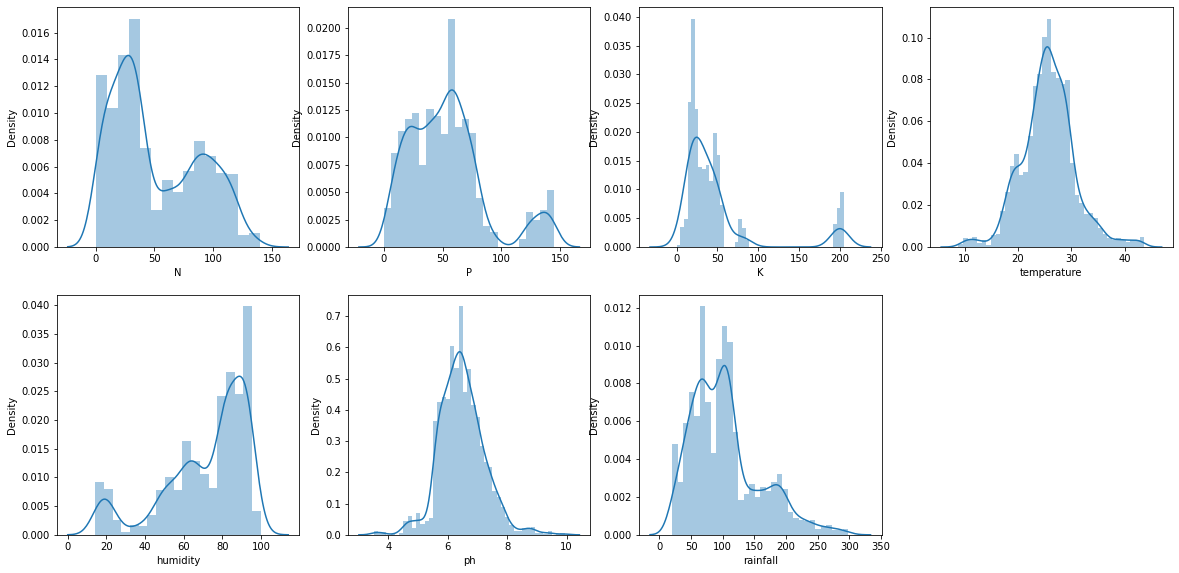

In [49]:
fig = plt.figure(figsize=(20,15))
for i,col in enumerate(df1.columns,1):
    plt.subplot(3,4,i)
    sns.distplot(df1[col])

plt.show()    

### Categorizing the data to determine water scarcity 

In [50]:
categor_condn = [(df['rainfall'] <= 150),
                  (df['rainfall'] > 250)]

rating = ['low','high']
df['Water Usage'] = np.select(categor_condn,rating,default = 'medium')

df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,Water Usage
0,90,42.0,43.0,20.879744,82.002744,6.502985,203.983200,rice,medium
1,85,58.0,41.0,22.000940,80.319644,7.038096,226.655537,rice,medium
2,60,55.0,44.0,23.004459,82.320763,7.840207,263.964248,rice,high
3,74,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice,medium
4,78,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice,high


In [51]:
df['Water Usage'].value_counts()

low       1779
medium     383
high        38
Name: Water Usage, dtype: int64

### Using Label Encoder function on column Water Usage

In [61]:
label_encoder = LabelEncoder()

In [62]:
df['Water Usage'] = label_encoder.fit_transform(df['Water Usage'])

In [63]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,Water Usage
0,90,42.0,43.0,20.879744,82.002744,6.502985,203.983200,rice,2
1,85,58.0,41.0,22.000940,80.319644,7.038096,226.655537,rice,2
2,60,55.0,44.0,23.004459,82.320763,7.840207,263.964248,rice,0
3,74,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice,2
4,78,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice,0


### Splitting the dataframe into training and testing data

In [64]:
# Applying get dummies function on categorical column
x = df.drop('label',axis = 1)
y = df['label']

In [65]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.30 , random_state = 10)

In [66]:
print("Dimension of x_train :",x_train.shape)
print("Dimension of x_test :",x_test.shape)
print("Dimension of y_train :",y_train.shape)
print("Dimension of y_test :",y_test.shape)

Dimension of x_train : (1540, 8)
Dimension of x_test : (660, 8)
Dimension of y_train : (1540,)
Dimension of y_test : (660,)


## Machine Learning Algorithms

### 1. Logistic Regression

In [67]:
logmodel = lm()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [68]:
pred_log = logmodel.predict(x_test)

In [69]:
pred_log

array(['chickpea', 'coconut', 'cotton', 'coffee', 'pomegranate', 'lentil',
       'muskmelon', 'mango', 'coconut', 'mothbeans', 'maize', 'maize',
       'maize', 'blackgram', 'banana', 'cotton', 'chickpea', 'cotton',
       'papaya', 'cotton', 'blackgram', 'kidneybeans', 'mungbean',
       'cotton', 'kidneybeans', 'mango', 'pigeonpeas', 'orange', 'orange',
       'maize', 'maize', 'pomegranate', 'coffee', 'cotton', 'cotton',
       'mothbeans', 'watermelon', 'pigeonpeas', 'cotton', 'apple',
       'muskmelon', 'coffee', 'grapes', 'orange', 'kidneybeans', 'orange',
       'grapes', 'banana', 'rice', 'rice', 'coconut', 'rice', 'jute',
       'coffee', 'blackgram', 'muskmelon', 'blackgram', 'blackgram',
       'rice', 'coconut', 'lentil', 'cotton', 'rice', 'blackgram',
       'coffee', 'muskmelon', 'chickpea', 'maize', 'mango', 'watermelon',
       'muskmelon', 'grapes', 'muskmelon', 'coffee', 'muskmelon',
       'mungbean', 'coconut', 'mungbean', 'orange', 'coffee', 'coconut',
       'gr

In [70]:
y_test.head(20)

299      chickpea
1859      coconut
1939       cotton
2194       coffee
1861      coconut
828        lentil
1409    muskmelon
1124        mango
1816      coconut
596     mothbeans
152         maize
163         maize
176         maize
729     blackgram
1056        apple
1927       cotton
282      chickpea
1965       cotton
1729       papaya
1967       cotton
Name: label, dtype: object

In [71]:
print(classification_report(y_test,pred_log))

              precision    recall  f1-score   support

       apple       0.97      0.78      0.86        36
      banana       0.97      1.00      0.98        28
   blackgram       0.93      0.74      0.82        34
    chickpea       0.97      0.97      0.97        29
     coconut       1.00      0.94      0.97        33
      coffee       0.97      0.97      0.97        36
      cotton       0.90      0.97      0.93        36
      grapes       1.00      1.00      1.00        23
        jute       0.79      0.88      0.83        25
 kidneybeans       0.97      1.00      0.99        33
      lentil       0.90      0.93      0.92        41
       maize       0.96      0.87      0.91        30
       mango       1.00      0.97      0.98        29
   mothbeans       0.76      1.00      0.86        28
    mungbean       0.96      1.00      0.98        25
   muskmelon       1.00      0.96      0.98        28
      orange       0.97      1.00      0.99        33
      papaya       1.00    

In [72]:
print(confusion_matrix(y_test,pred_log))

[[28  1  1  1  0  1  0  0  1  0  1  0  0  1  1  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 25  0  0  0  0  0  0  0  3  0  0  6  0  0  0  0  0  0  0  0]
 [ 1  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 31  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0 35  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0 38  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 28  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 28  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [73]:
accuracy_score(y_test,pred_log)

0.9393939393939394

### 2. Decision Tree

In [74]:
dtree = DecisionTreeClassifier(criterion = 'gini')

In [75]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [76]:
y_predictions = dtree.predict(x_test)
print(y_predictions)

['chickpea' 'coconut' 'cotton' 'coffee' 'coconut' 'lentil' 'muskmelon'
 'mango' 'coconut' 'mothbeans' 'maize' 'maize' 'maize' 'blackgram'
 'banana' 'cotton' 'chickpea' 'cotton' 'papaya' 'cotton' 'blackgram'
 'kidneybeans' 'mungbean' 'cotton' 'kidneybeans' 'mango' 'pigeonpeas'
 'orange' 'orange' 'maize' 'maize' 'pomegranate' 'coffee' 'maize' 'cotton'
 'mothbeans' 'watermelon' 'pigeonpeas' 'cotton' 'apple' 'muskmelon'
 'coffee' 'grapes' 'orange' 'kidneybeans' 'pomegranate' 'grapes' 'banana'
 'rice' 'rice' 'coconut' 'rice' 'jute' 'coffee' 'blackgram' 'muskmelon'
 'blackgram' 'blackgram' 'rice' 'coconut' 'lentil' 'cotton' 'rice'
 'blackgram' 'coffee' 'muskmelon' 'chickpea' 'maize' 'mango' 'watermelon'
 'muskmelon' 'grapes' 'muskmelon' 'coffee' 'muskmelon' 'mungbean'
 'coconut' 'mungbean' 'orange' 'coffee' 'coconut' 'grapes' 'coconut'
 'cotton' 'cotton' 'papaya' 'chickpea' 'rice' 'pomegranate' 'mango' 'jute'
 'banana' 'blackgram' 'lentil' 'papaya' 'kidneybeans' 'lentil' 'grapes'
 'apple' 'g

In [77]:
print(y_test)

299     chickpea
1859     coconut
1939      cotton
2194      coffee
1861     coconut
          ...   
256     chickpea
112        maize
2062        jute
1126       mango
1247      grapes
Name: label, Length: 660, dtype: object


In [78]:
accuracy_score(y_test,y_predictions)

0.9651515151515152

In [79]:
print(confusion_matrix(y_test,y_predictions))

[[28  1  1  1  0  1  0  0  0  0  1  0  0  1  1  0  0  0  0  0  1  0]
 [ 0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 36  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 40  0  0  0  1  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0 29  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0]
 [ 1  0  1  0  0  0  0  0  0  0  1  0  0 25  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0

### 3. Random Forest 

In [80]:
rfc = RandomForestClassifier(n_estimators = 500,criterion = "entropy")

In [81]:
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [82]:
predict_r = rfc.predict(x_test)

In [83]:
predict_r

array(['chickpea', 'coconut', 'cotton', 'coffee', 'coconut', 'lentil',
       'muskmelon', 'mango', 'coconut', 'mothbeans', 'maize', 'maize',
       'maize', 'blackgram', 'banana', 'cotton', 'chickpea', 'cotton',
       'papaya', 'cotton', 'blackgram', 'kidneybeans', 'mungbean',
       'cotton', 'kidneybeans', 'mango', 'pigeonpeas', 'orange', 'orange',
       'maize', 'maize', 'pomegranate', 'coffee', 'maize', 'cotton',
       'mothbeans', 'watermelon', 'pigeonpeas', 'cotton', 'apple',
       'muskmelon', 'coffee', 'grapes', 'orange', 'kidneybeans', 'orange',
       'grapes', 'banana', 'rice', 'rice', 'coconut', 'rice', 'jute',
       'coffee', 'blackgram', 'muskmelon', 'blackgram', 'blackgram',
       'rice', 'coconut', 'lentil', 'cotton', 'rice', 'blackgram',
       'coffee', 'muskmelon', 'chickpea', 'maize', 'mango', 'watermelon',
       'muskmelon', 'grapes', 'muskmelon', 'coffee', 'muskmelon',
       'mungbean', 'coconut', 'mungbean', 'orange', 'coffee', 'coconut',
       'grapes'

In [84]:
accuracy_score(y_test,predict_r)

0.9787878787878788

In [85]:
print(confusion_matrix(y_test,predict_r))

[[28  1  1  1  0  1  0  0  1  0  1  0  0  1  1  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 36  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 40  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 29  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 28  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

### Summary of the machine learning models
- Logistic Regression :- Accuracy score = 93.63
- Decision Tree :- Accuracy score = 95.45
- Random Forest :- Accuracy score = 97.87  

#### Suitable model chosen for the problem statement is random forest

### Determining suitable crop according to a set of features

In [86]:
prediction = rfc.predict((np.array([[98,24,53,34,76,14,252,0]])))
print("The suggested crop is : ",prediction) 

The suggested crop is :  ['watermelon']


In [87]:
prediction = rfc.predict((np.array([[76,21,65,48,63,19,290,1]])))
print("The suggested crop is : ",prediction)

The suggested crop is :  ['coffee']


In [88]:
prediction = rfc.predict((np.array([[61,38,55,76,52,28,180,2]])))
print("The suggested crop is : ",prediction)

The suggested crop is :  ['jute']
